# Data Analysis: Fraud Detection for Combined Claims and Customer Dataset

<a id='overview-0'></a>

## [Overview](./0-AutoClaimFraudDetection.ipynb)
* **[1: Overview, Architecture, and Data Exploration](./0-AutoClaimFraudDetection.ipynb)**
  * **[DataSets and Exploratory Data Analysis](#nb0-data-explore)**
  * **[Exploratory Data Science and Operational ML workflows](#nb0-workflows)**
  * **[The ML Life Cycle: Detailed View](#nb0-ml-lifecycle)**


<a id ='nb0-data-explore'> </a>

## DataSets and Exploratory Visualizations
[Overview](#overview-0)

The dataset is synthetically generated and consists of <font color='green'> customers and claims </font> datasets.
Here we will load them and do some exploratory visualizations.

In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install seaborn==0.11.1

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [56]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

%matplotlib inline
sns.set(color_codes=True)

df_claims = pd.read_csv("./data/claims.csv", index_col=0)
df_customers = pd.read_csv("./data/customers.csv", index_col=0)

In [57]:
print(df_claims.isnull().sum().sum())
print(df_customers.isnull().sum().sum())

1456
0


This should return no null values in both of the datasets.

The overwhemling majority of claims are legitimate (i.e. not fraudulent).

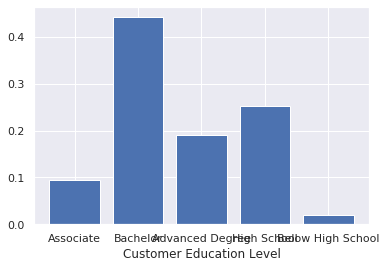

In [58]:
# plot the education categories
educ = df_customers.customer_education.value_counts(normalize=True, sort=False)
plt.bar(educ.index, educ.values)
plt.xlabel("Customer Education Level");

Majority of the total claim amounts are under $25,000.

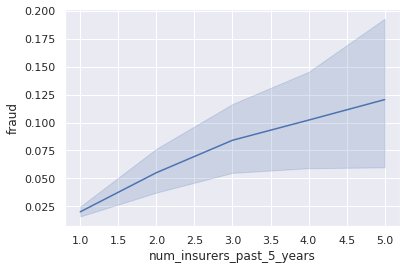

In [59]:
df_combined = df_customers.join(df_claims)
sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined);

Fraud is positively correlated with having a greater number of insurers over the past 5 years. Customers who switched insurers more frequently also had more prevelance of fraud.

In [60]:
df_sex= pd.get_dummies(df_combined,columns=["customer_gender"], prefix='customer_gender')
# print(df_combined.head())

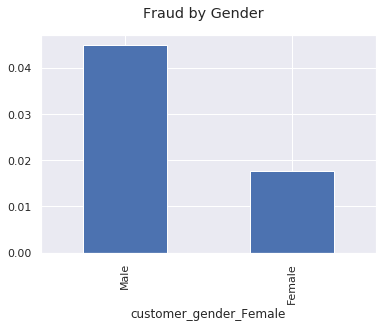

In [61]:
df_sex.groupby("customer_gender_Female").mean()["fraud"].plot.bar()
plt.xticks([0, 1], ["Male", "Female"])
plt.suptitle("Fraud by Gender");

Fraudulent claims come disproportionately from male customers.

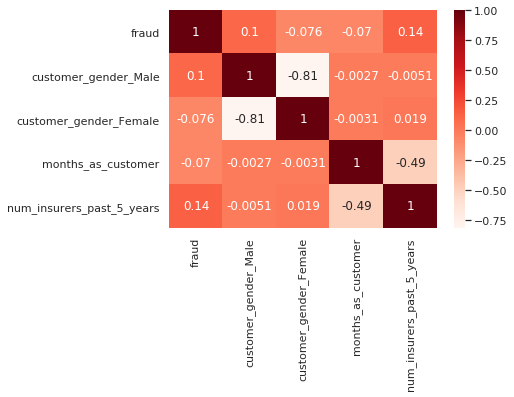

In [62]:
# Creating a correlation matrix of fraud, gender, months as customer, and number of different insurers
cols = [
    "fraud",
    "customer_gender_Male",
    "customer_gender_Female",
    "months_as_customer",
    "num_insurers_past_5_years",
]
corr = df_sex[cols].corr()

# plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="Reds");

Fraud is correlated with having more insurers in the past 5 years, and negatively correlated with being a customer for a longer period of time. These go hand in hand and mean that long time customers are less likely to commit fraud.

### Combined DataSets

We have been looking at the indivudual datasets, now let's look at their combined view (join).

In [63]:
import pandas as pd

df_combined = pd.read_csv("./data/claims_customer.csv")

In [64]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("^Unnamed: 0")]
# get rid of an unwanted column
df_combined.head()

,policy_id,months_as_customer,vehicle_claim,collision_type_na,total_claim_amount,policy_state_ca,policy_liability,authorities_contacted_police,collision_type_front,incident_type_theft,...,authorities_contacted_ambulance,incident_type_collision,policy_deductable,policy_annual_premium,policy_state_az,driver_relationship_na,driver_relationship_other,customer_education,police_report_available,customer_age
0,2013,166,9955.0,0,25455.0,1,0,0,0,0,...,0,1,750,2900,0,0,0,4,0,46
1,149,45,33786.0,0,36786.0,1,0,1,0,0,...,0,1,750,3000,0,0,0,4,1,27
2,3857,367,9655.0,0,20355.0,1,0,1,1,0,...,0,1,750,3000,0,0,0,1,1,48
3,3876,32,9512.0,1,14812.0,0,1,1,0,0,...,0,0,750,3000,0,1,0,4,0,27
4,4226,4,14889.0,0,23889.0,1,0,1,1,0,...,0,1,750,3000,0,0,0,4,1,24


In [65]:
df_combined.describe()

,policy_id,months_as_customer,vehicle_claim,collision_type_na,total_claim_amount,policy_state_ca,policy_liability,authorities_contacted_police,collision_type_front,incident_type_theft,...,authorities_contacted_ambulance,incident_type_collision,policy_deductable,policy_annual_premium,policy_state_az,driver_relationship_na,driver_relationship_other,customer_education,police_report_available,customer_age
count,5000.000000,5000.0000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,98.3446,17266.867400,0.14560,41267.167400,0.626800,1.115200,0.701800,0.421800,0.048800,...,0.029200,0.85440,751.060000,2925.160000,0.107800,0.14560,0.040000,2.531000,0.421600,44.038000
std,1443.520003,71.7000,10108.365382,0.35274,32835.025055,0.483703,0.984135,0.457514,0.493896,0.215471,...,0.168384,0.35274,13.487505,142.912768,0.310159,0.35274,0.195979,1.119504,0.493865,13.465809
min,1.000000,1.0000,1000.000000,0.00000,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,750.000000,2200.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000
25%,1250.750000,44.0000,10174.750000,0.00000,22334.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,750.000000,2900.000000,0.000000,0.00000,0.000000,1.000000,0.000000,33.000000
50%,2500.500000,85.0000,14864.000000,0.00000,33080.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.00000,750.000000,3000.000000,0.000000,0.00000,0.000000,3.000000,0.000000,44.000000
75%,3750.250000,136.0000,21761.250000,0.00000,48959.500000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.00000,750.000000,3000.000000,0.000000,0.00000,0.000000,3.000000,1.000000,54.000000
max,5000.000000,495.0000,51051.000000,1.00000,588868.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1100.000000,3000.000000,1.000000,1.00000,1.000000,4.000000,1.000000,70.000000


Let's explore any unique, missing, or large percentage category in the combined dataset.

In [54]:
combined_stats = []


for col in df_combined.columns:
    combined_stats.append(
        (
            col,
            df_combined[col].nunique(),
            df_combined[col].isnull().sum() * 100 / df_combined.shape[0],
            df_combined[col].value_counts(normalize=True, dropna=False).values[0] * 100,
            df_combined[col].dtype,
        )
    )

stats_df = pd.DataFrame(
    combined_stats,
    columns=["feature", "unique_values", "percent_missing", "percent_largest_category", "datatype"],
)
stats_df.sort_values("percent_largest_category", ascending=False)

,feature,unique_values,percent_missing,percent_largest_category,datatype
39,policy_deductable,8,0.0,99.00,int64
23,policy_state_id,2,0.0,97.30,int64
24,authorities_contacted_fire,2,0.0,97.30,int64
37,authorities_contacted_ambulance,2,0.0,97.08,int64
13,fraud,2,0.0,96.72,int64
43,driver_relationship_other,2,0.0,96.00,int64
16,policy_state_nv,2,0.0,95.56,int64
25,driver_relationship_child,2,0.0,95.48,int64
9,incident_type_theft,2,0.0,95.12,int64
32,num_claims_past_year,7,0.0,93.30,int64


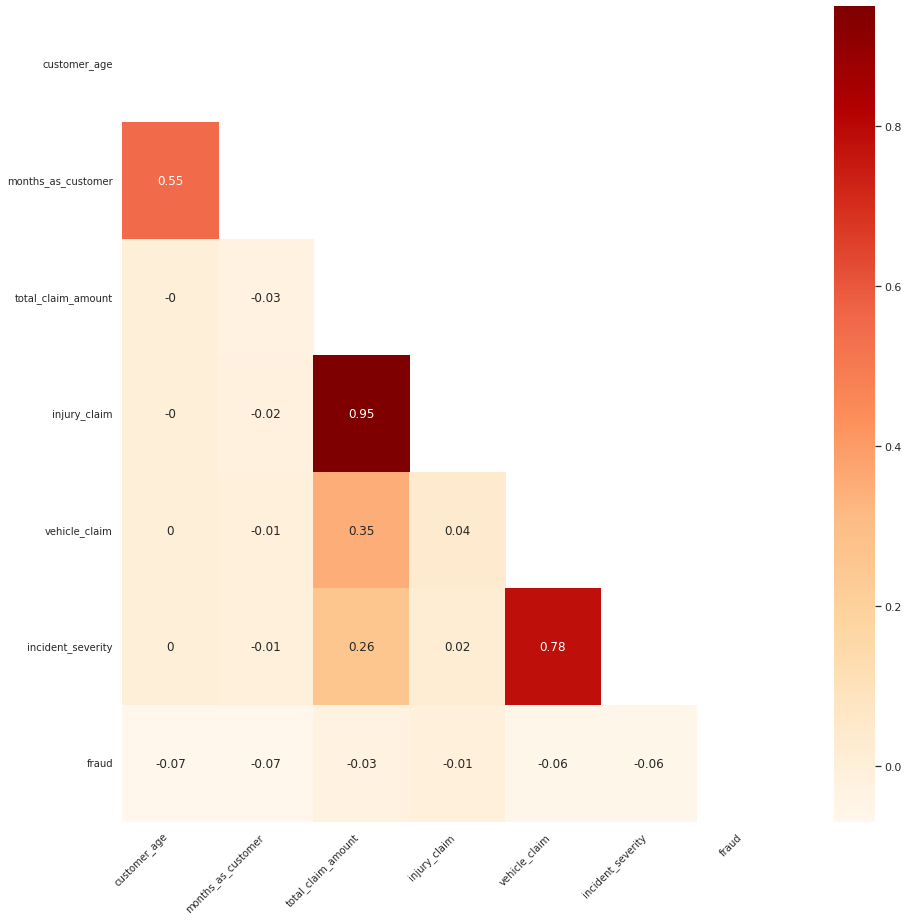

In [55]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("white")

corr_list = [
    "customer_age",
    "months_as_customer",
    "total_claim_amount",
    "injury_claim",
    "vehicle_claim",
    "incident_severity",
    "fraud",
]

corr_df = df_combined[corr_list]
corr = round(corr_df.corr(), 2)

fix, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="OrRd")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha="right", rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

___

### Next Notebook: [Data Preparation, Data Wrangler, Feature Store](./03-DataPrep-Wrangler-FeatureStore.ipynb)

In [67]:
df_combined.columns

Index(['policy_id', 'months_as_customer', 'vehicle_claim', 'collision_type_na',
       'total_claim_amount', 'policy_state_ca', 'policy_liability',
       'authorities_contacted_police', 'collision_type_front',
       'incident_type_theft', 'incident_type_breakin', 'policy_state_wa',
       'incident_day', 'fraud', 'collision_type_rear', 'num_witnesses',
       'policy_state_nv', 'driver_relationship_spouse',
       'num_insurers_past_5_years', 'customer_gender_female', 'incident_hour',
       'incident_severity', 'collision_type_side', 'policy_state_id',
       'authorities_contacted_fire', 'driver_relationship_child',
       'injury_claim', 'policy_state_or', 'incident_dow',
       'driver_relationship_self', 'customer_gender_male', 'incident_month',
       'num_claims_past_year', 'num_injuries', 'authorities_contacted_none',
       'auto_year', 'num_vehicles_involved', 'authorities_contacted_ambulance',
       'incident_type_collision', 'policy_deductable', 'policy_annual_premium',
